In [4]:
import pandas as pd
import numpy as np
x=pd.read_csv("hongos_datos.csv")
y=pd.read_csv("hongos_target.csv")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5,
                           scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train.values.ravel())
best_log_reg = grid_search.best_estimator_
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

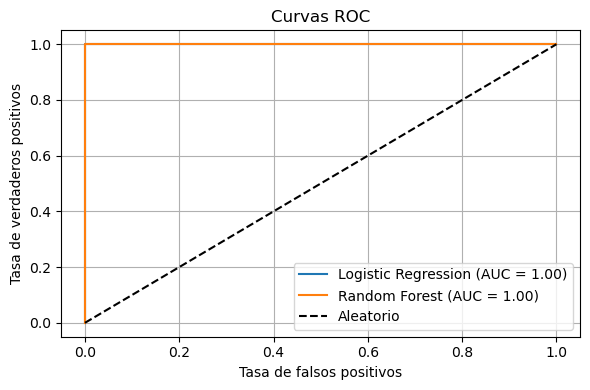

AUC Logistic Regression: 1.0000
AUC Random Forest: 1.0000


In [7]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

y_prob_logreg = best_log_reg.predict_proba(X_test)[:, 1]
y_prob_rf = grid.best_estimator_.predict_proba(X_test)[:, 1]

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig("comparacion_roc_auc.png")
plt.show()

print(f"AUC Logistic Regression: {auc_logreg:.4f}")
print(f"AUC Random Forest: {auc_rf:.4f}")

In [11]:
coeficientes = pd.Series(best_log_reg.coef_[0], index=x.columns)
print("Coeficientes regresión logística:")
print(coeficientes.sort_values(ascending=False).head(10))

importancias = pd.Series(grid.best_estimator_.feature_importances_, index=x.columns)
print("\nImportancias Random Forest:")
print(importancias.sort_values(ascending=False).head(10))

Coeficientes regresión logística:
gill-size                 14.509548
ring-type                  9.342953
bruises                    2.980354
veil-color                 2.812154
cap-surface                0.664556
habitat                    0.382705
stalk-color-below-ring     0.218112
veil-type                  0.000000
gill-color                -0.036027
stalk-color-above-ring    -0.073801
dtype: float64

Importancias Random Forest:
spore-print-color           0.236665
odor                        0.223316
stalk-surface-above-ring    0.088854
stalk-surface-below-ring    0.056420
stalk-shape                 0.056057
stalk-root                  0.046781
gill-size                   0.043898
bruises                     0.041638
habitat                     0.039950
ring-type                   0.026344
dtype: float64
